In [1]:
import xml.etree.ElementTree as ET
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from os import path
import pandas as pd

# Set sequences, plotting limits, and primer regions

In [2]:
hiv='GGAGTACTTCAAGAACTGCTGACATCGAGCTTGCTACAAGGGACTTTCCGCTGGGGACTTTCCAGGGAGGCGTGGCCTGGGCGGGACTGGGGAGTGGCGAGCCCTCAGATGCTGCATATAAGCAGCTGCTTTTTGCCTGTACTGGGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTAACTAGGGAACCCACTGCTTAAGCCTCAATAAAGCTTGCCTTGAGTGCTTCAAAAAAAAAAAAAAAAAAAAAAAAGAAACAACAACAACAAC'

In [3]:
HIV_START=0#230
HIV_END=len(hiv)#270
HIV_PRIMER1 = (0, 35)
HIV_PRIMER2 = (261,280)

In [4]:
s41='GGGTACAAAAAAAAAAAGTACAAAGAAACAACAACAACAAC'

In [5]:
s41_PLOTSTART=6 #0
s41_PLOTEND=17 #len(s41)#

In [6]:
s1 = 'GGAAAAGGCGTCGAGTAGACGCCAACAACGGAAACCTGAAAGATCAAAAAAAAAAAGATCAAGTACAAAAAAAAAAAGTACAACAGGAAAAAAAAAAAGCATAGGTTCGCCTATGCAAACCAAACCGTCAGCGAGTAGCTGACAAAAAGAAACAACAACAACAAC'

In [7]:
LASTA_START=70#80
LASTA_END=110#101

In [8]:
s7 = 'GGAAAAGGCGTCGAGTAGACGCCAACAACGGAAACCTGAAAGATCAAAAAACAAAAGATCAAGTACAAAAAACAAAAGTACAACAGGAAAAAACAAAAGCATAGGTTCGCCTATGCAAACCAAACCGTCAGCGAGTAGCTGACAAAAAGAAACAACAACAACAAC'

In [9]:
rt_names = ['AMV', 'MMLV', 'SSII', 'SSIII', 'SSIIMn', 'SSIV', 'TGIRT', 'Marathon']

# Store and write reactivities

In [10]:
class Reactivities:
    def __init__(self, all_reactivities, non_nan_idxs, non_nan_vals):
        self.all_reactivities = all_reactivities
        self.non_nan_idxs = non_nan_idxs
        self.non_nan_vals = non_nan_vals

In [11]:
def write_arr(reactivity_arr, filename):
    f = open(filename, 'w')
    for reactivity in reactivity_arr:
        f.write('%f\n' % float(reactivity))
    f.close()

# Process and display reactivities for HIV 3'UTR construct

HIV reactivity profile ShapeMapper1/M2seq


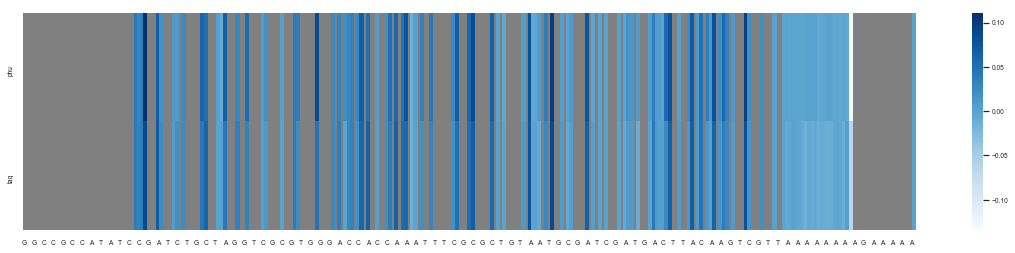

HIV reactivity profile ShapeMapper2


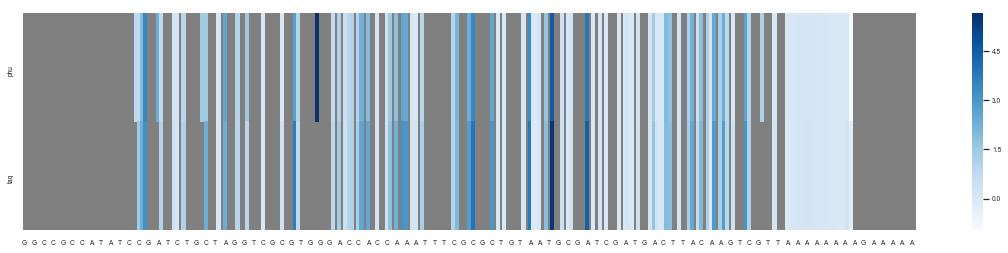

HIV reactivity profile RNAFramework


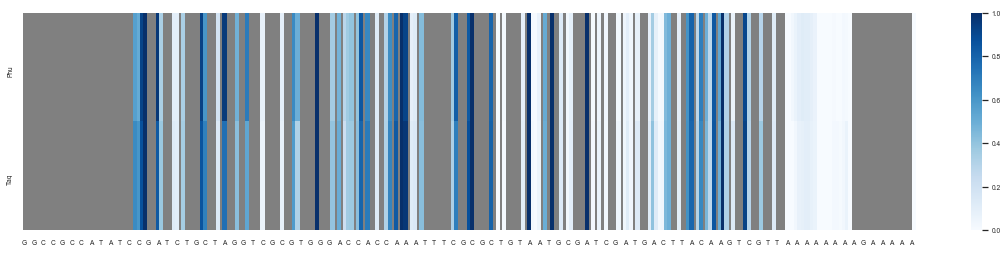

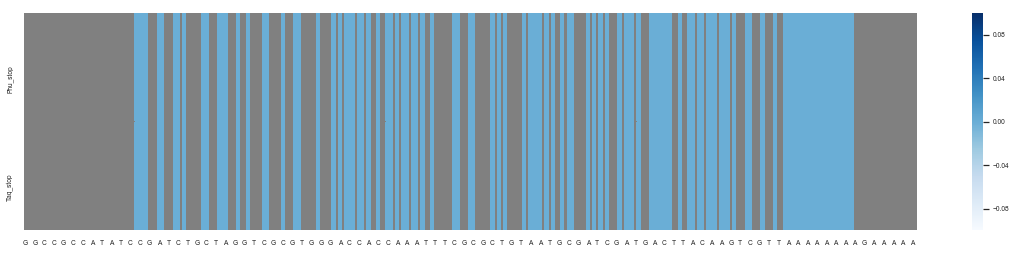

HIV reactivity profile RNAFramework2


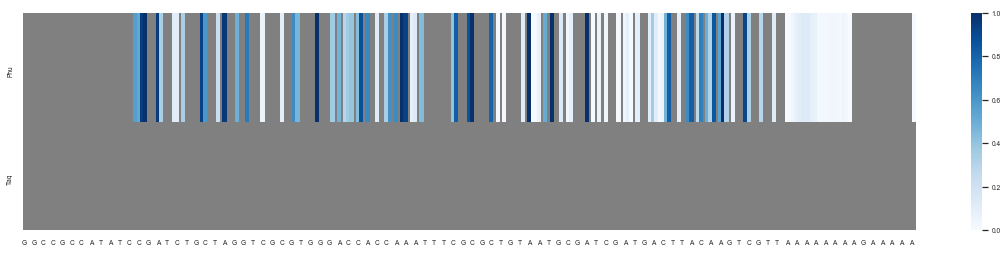

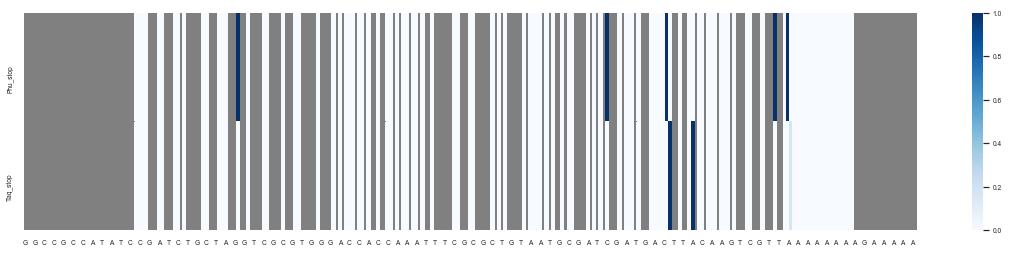

In [15]:
# RNA Framework with bowtie2 alignment based on ShapeMapper
def get_reactivities_rnaframework(names, do_write=True):    
    reactivity_dict = {}
    for poly_name in names:
        reactivity_xml_file =  'hiv/rna_framework_bowtie2_shapemapper/' + poly_name + '/hiv.xml'
        if not path.exists(reactivity_xml_file):
            reactivity_dict[poly_name] = None
            continue
        reactivity_tree = ET.parse(reactivity_xml_file)
        root = reactivity_tree.getroot()
        reactivity_arr = np.array(root[0][1].text.replace('\n', '').replace('\t', '').split(','))
        for ii in range(HIV_PRIMER1[0], HIV_PRIMER1[1]):
            reactivity_arr[ii] = 'NaN'
        for ii in range(HIV_PRIMER2[0], HIV_PRIMER2[1]):
            reactivity_arr[ii] = 'NaN'
        if do_write:
            write_arr(reactivity_arr, 'final_data/hiv/rna_framework/' + poly_name + '.txt')
        non_nan_idxs = np.arange(len(reactivity_arr))[reactivity_arr != 'NaN']
        non_nan_vals = [float(x) for x in reactivity_arr[reactivity_arr != 'NaN']]
        reactivity_dict[poly_name] = Reactivities(reactivity_arr, non_nan_idxs, non_nan_vals)
    return reactivity_dict

# RNA Framework with bowtie2 alignment based on ShapeMapper 2
def get_reactivities_rnaframework2(names):    
    reactivity_dict = {}
    for poly_name in names:
        reactivity_xml_file =  'hiv/rna_framework_bowtie2_shapemapper2/' + poly_name + '/hiv.xml'
        if not path.exists(reactivity_xml_file):
            reactivity_dict[poly_name] = None
            continue
        reactivity_tree = ET.parse(reactivity_xml_file)
        root = reactivity_tree.getroot()
        reactivity_arr = np.array(root[0][1].text.replace('\n', '').replace('\t', '').split(','))
        for ii in range(HIV_PRIMER1[0], HIV_PRIMER1[1]):
            reactivity_arr[ii] = 'NaN'
        for ii in range(HIV_PRIMER2[0], HIV_PRIMER2[1]):
            reactivity_arr[ii] = 'NaN'
        non_nan_idxs = np.arange(len(reactivity_arr))[reactivity_arr != 'NaN']
        non_nan_vals = [float(x) for x in reactivity_arr[reactivity_arr != 'NaN']]
        reactivity_dict[poly_name] = Reactivities(reactivity_arr, non_nan_idxs, non_nan_vals)
    return reactivity_dict

# Reactivities from ShapeMapper 2
def get_reactivities_shapemapper(names, do_write=True):
    reactivity_dict = {}
    for poly_name in names:
        reactivity_file = 'hiv/shapemapper2/' + poly_name + '_profile.txt'
        if not path.exists(reactivity_file):
            reactivity_dict[poly_name] = None
            continue
        reactivity_arr = [float(x.split('\t')[-2]) for x in open(reactivity_file).readlines()[1:]]
        for ii in range(HIV_PRIMER1[0], HIV_PRIMER1[1]):
            reactivity_arr[ii] = 'NaN'
        for ii in range(HIV_PRIMER2[0], HIV_PRIMER2[1]):
            reactivity_arr[ii] = 'NaN'
        for ii in range(len(reactivity_arr)):
            if hiv[ii] != 'A' and hiv[ii] != 'C':
                reactivity_arr[ii] = 'NaN'
        reactivity_arr = np.array(reactivity_arr)
        if do_write:
            write_arr(reactivity_arr, 'final_data/hiv/shapemapper2/' + poly_name + '.txt')
        non_nan_idxs = np.arange(len(reactivity_arr))[reactivity_arr != 'NaN']
        non_nan_vals = [float(x) for x in reactivity_arr[reactivity_arr != 'NaN']]
        reactivity_dict[poly_name] = Reactivities(reactivity_arr, non_nan_idxs, non_nan_vals)
    return reactivity_dict

# Reactivities from ShapeMapper
def get_reactivities_shapemapper1(names, do_write=True):
    reactivity_dict = {}
    for poly_name in names:
        reactivity_file = 'hiv/shapemapper/analysis/' + poly_name + '_1D_DMS.csv'
        if not path.exists(reactivity_file):
            reactivity_dict[poly_name] = None
            continue
        reactivity_arr = open(reactivity_file).readlines()
        for ii in range(HIV_PRIMER1[0], HIV_PRIMER1[1]):
            reactivity_arr[ii] = 'NaN'
        for ii in range(HIV_PRIMER2[0], HIV_PRIMER2[1]):
            reactivity_arr[ii] = 'NaN'
        for ii in range(len(reactivity_arr)):
            if hiv[ii] != 'A' and hiv[ii] != 'C':
                reactivity_arr[ii] = 'NaN'
        reactivity_arr = np.array(reactivity_arr)
        if do_write:
            write_arr(reactivity_arr, 'final_data/hiv/shapemapper/' + poly_name + '.txt')
        non_nan_idxs = np.arange(len(reactivity_arr))[reactivity_arr != 'NaN']
        non_nan_vals = [float(x) for x in reactivity_arr[reactivity_arr != 'NaN']]
        reactivity_dict[poly_name] = Reactivities(reactivity_arr, non_nan_idxs, non_nan_vals)
    return reactivity_dict

# Display reactivities in heatmap
def make_fig5_heatmap_hiv(seq, reactivity_dict, names):
    heatmap_labels = list(seq[HIV_START:HIV_END])
    heatmap_data = []
    for poly_name in names:
        heatmap_reac = [np.nan] * len(heatmap_labels)
        if reactivity_dict[poly_name] != None:
            heatmap_reac = reactivity_dict[poly_name].all_reactivities[HIV_START:HIV_END]
            heatmap_reac = [np.nan if x == 'NaN' else float(x) for x in heatmap_reac]
        heatmap_data += [heatmap_reac]
    heatmap_data = np.array(heatmap_data)
    heatmap_df = pd.DataFrame(heatmap_data, index=names, columns=heatmap_labels)
    df_mask = heatmap_df.isnull()
    sns.set(font_scale=0.6)
    plt.figure(figsize=(20,4))
    g = sns.heatmap(heatmap_df, mask=df_mask, cmap='Blues')
    g.set_facecolor('grey')
    plt.show()
    
# Obtain reactivities for each sample
reactivity_dict = get_reactivities_rnaframework(['Phu', 'Taq'])
reactivity_dict_stop = get_reactivities_rnaframework(['Phu_stop', 'Taq_stop'])
reactivity_dict2 = get_reactivities_rnaframework2(['Phu', 'Taq'])
reactivity_dict_stop2 = get_reactivities_rnaframework2(['Phu_stop', 'Taq_stop'])
reactivity_dict_sm2 = get_reactivities_shapemapper(['phu', 'taq'])
reactivity_dict_sm1 = get_reactivities_shapemapper1(['phu', 'taq'])

# Display reactivity heatmaps
print("HIV reactivity profile ShapeMapper1/M2seq")
make_fig5_heatmap_hiv(hiv, reactivity_dict_sm1, ['phu', 'taq'])
print("HIV reactivity profile ShapeMapper2")
make_fig5_heatmap_hiv(hiv, reactivity_dict_sm2, ['phu', 'taq'])
print("HIV reactivity profile RNAFramework")
make_fig5_heatmap_hiv(hiv, reactivity_dict, ['Phu', 'Taq'])
make_fig5_heatmap_hiv(hiv, reactivity_dict_stop, ['Phu_stop', 'Taq_stop'])
print("HIV reactivity profile RNAFramework2")
make_fig5_heatmap_hiv(hiv, reactivity_dict2, ['Phu', 'Taq'])
make_fig5_heatmap_hiv(hiv, reactivity_dict_stop2, ['Phu_stop', 'Taq_stop'])

# Process and display reactivities for the TOD constructs

In [24]:
# Obtain reactivities from RNA Framework
def get_reactivity_dict(fullseq_name, base_name, seq_name, do_write=True):
    reactivity_dict = {}
    for rt_name in rt_names:
        reactivity_xml_file = fullseq_name + '/rna_framework_bt2/' + base_name + '/' + rt_name + '/' + seq_name + '.xml'
        if not path.exists(reactivity_xml_file):
            reactivity_dict[rt_name] = None
            continue
        reactivity_tree = ET.parse(reactivity_xml_file)
        root = reactivity_tree.getroot()
        reactivity_arr = np.array(root[0][1].text.replace('\n', '').replace('\t', '').split(','))
        if do_write:
            write_arr(reactivity_arr, 'final_data/' + fullseq_name + '/rna_framework/' + base_name + '_' + rt_name + '.txt')
        non_nan_idxs = np.arange(len(reactivity_arr))[reactivity_arr != 'NaN']
        non_nan_vals = [float(x) for x in reactivity_arr[reactivity_arr != 'NaN']]
        reactivity_dict[rt_name] = Reactivities(reactivity_arr, non_nan_idxs, non_nan_vals)
    return reactivity_dict

# Obtain reactivities from ShapeMapper 2
def get_reactivities_shapemapper(fullseq_name, base_name, seq_name, is_dms=False, base_seq=s1, do_write=True):
    reactivity_dict = {}
    for rt_name in rt_names:
        reactivity_file = fullseq_name + '/shapemapper2/' + base_name + '/' + rt_name + '/data/' + seq_name + '_profile.txt'
        if not path.exists(reactivity_file):
            reactivity_dict[rt_name] = None
            continue
        reactivity_arr = [str(x.split('\t')[-2]) for x in open(reactivity_file).readlines()[1:]]
        if is_dms:
            for ii in range(len(reactivity_arr)):
                if base_seq[ii] != 'A' and base_seq[ii] != 'C':
                    reactivity_arr[ii] = 'NaN'
        reactivity_arr = np.array(reactivity_arr)
        if do_write:
            write_arr(reactivity_arr, 'final_data/' + fullseq_name + '/shapemapper2/' + base_name + '_' + rt_name + '.txt')
        non_nan_idxs = np.arange(len(reactivity_arr))[reactivity_arr != 'NaN']
        non_nan_vals = [float(x) for x in reactivity_arr[reactivity_arr != 'NaN']]
        reactivity_dict[rt_name] = Reactivities(reactivity_arr, non_nan_idxs, non_nan_vals)
    return reactivity_dict

# Obtain reactivities from ShapeMapper
def get_reactivities_shapemapper1(fullseq_name, base_name, is_dms=False, base_seq=s1, do_write=True):
    reactivity_dict = {}
    for rt_name in rt_names:
        reactivity_file = fullseq_name + '/shapemapper/analysis/' + base_name + '_' + rt_name + '_1D_DMS_normalized.csv'
        if not path.exists(reactivity_file):
            reactivity_dict[rt_name] = None
            continue
        reactivity_arr = open(reactivity_file).readlines()
        if is_dms:
            for ii in range(len(reactivity_arr)):
                if base_seq[ii] != 'A' and base_seq[ii] != 'C':
                    reactivity_arr[ii] = 'NaN'
        reactivity_arr = np.array(reactivity_arr)
        if do_write:
            write_arr(reactivity_arr, 'final_data/' + fullseq_name + '/shapemapper/' + base_name + '_' + rt_name + '.txt')
        non_nan_idxs = np.arange(len(reactivity_arr))[reactivity_arr != 'NaN']
        non_nan_vals = [float(x) for x in reactivity_arr[reactivity_arr != 'NaN']]
        reactivity_dict[rt_name] = Reactivities(reactivity_arr, non_nan_idxs, non_nan_vals)
    return reactivity_dict

s1_reactivity_dict_dms_stop = get_reactivity_dict('tod', 's1_dms_stop', 's1')
s1_reactivity_dict_dms = get_reactivity_dict('tod', 's1_dms', 's1')
s1_reactivity_dict_shape_stop = get_reactivity_dict('tod', 's1_shape_stop', 's1')
s1_reactivity_dict_shape = get_reactivity_dict('tod', 's1_shape', 's1')

s7_reactivity_dict_dms_stop = get_reactivity_dict('tod', 's7_dms_stop', 's7')
s7_reactivity_dict_dms = get_reactivity_dict('tod', 's7_dms', 's7')
s7_reactivity_dict_shape_stop = get_reactivity_dict('tod', 's7_shape_stop', 's7')
s7_reactivity_dict_shape = get_reactivity_dict('tod', 's7_shape', 's7')

s1_reactivity_dict_dms_sm = get_reactivities_shapemapper('tod', 's1_dms', 'tod_s1', is_dms=True, base_seq=s1)
s1_reactivity_dict_shape_sm = get_reactivities_shapemapper('tod', 's1_shape', 'tod_s1')
s7_reactivity_dict_dms_sm = get_reactivities_shapemapper('tod', 's7_dms', 'tod_s7', is_dms=True, base_seq=s7)
s7_reactivity_dict_shape_sm = get_reactivities_shapemapper('tod', 's7_shape', 'tod_s7')

s1_reactivity_dict_dms_sm1 = get_reactivities_shapemapper1('tod', 's1_dms', is_dms=True, base_seq=s1)
s1_reactivity_dict_shape_sm1 = get_reactivities_shapemapper1('tod', 's1_shape')
s7_reactivity_dict_dms_sm1 = get_reactivities_shapemapper1('tod', 's7_dms', is_dms=True, base_seq=s7)
s7_reactivity_dict_shape_sm1 = get_reactivities_shapemapper1('tod', 's7_shape')

a10_reactivity_dict = get_reactivity_dict('tod_syn', 'a10_na', 's41')
a10_reactivity_dict_stop = get_reactivity_dict('tod_syn', 'a10_stop', 's41')
a5_reactivity_dict = get_reactivity_dict('tod_syn', 'a5_na', 's41')
a5_reactivity_dict_stop = get_reactivity_dict('tod_syn', 'a5_stop', 's41')
a10_reactivity_dict_ra = get_reactivity_dict('tod_syn', 'a10_ra', 's41')
a5_reactivity_dict_ra = get_reactivity_dict('tod_syn', 'a5_ra', 's41')
a10_reactivity_dict_la = get_reactivity_dict('tod_syn', 'a10_la', 's41')
a5_reactivity_dict_la = get_reactivity_dict('tod_syn', 'a5_la', 's41')

a10_reactivity_dict_sm = get_reactivities_shapemapper('tod_syn', 'a10', 'todsyn_s41')
a5_reactivity_dict_sm = get_reactivities_shapemapper('tod_syn', 'a5', 'todsyn_s41')

a10_reactivity_dict_sm1 = get_reactivities_shapemapper1('tod_syn', 'a10')
a5_reactivity_dict_sm1 = get_reactivities_shapemapper1('tod_syn', 'a5')

In [25]:
# Obtain reactivities from RNA Framework (raw reactivities)
def get_reactivity_dict_raw(fullseq_name, base_name, seq_name, do_write=True):
    reactivity_dict = {}
    for rt_name in rt_names:
        reactivity_xml_file = fullseq_name + '/rna_framework_bt2/' + base_name + '/' + rt_name + '/' + seq_name + '.xml'
        if not path.exists(reactivity_xml_file):
            reactivity_dict[rt_name] = None
            continue
        reactivity_tree = ET.parse(reactivity_xml_file)
        root = reactivity_tree.getroot()
        reactivity_arr = np.array(root[0][1].text.replace('\n', '').replace('\t', '').split(','))
        if do_write:
            write_arr(reactivity_arr, 'final_data/' + fullseq_name + '/rna_framework_raw/' + base_name + '_' + rt_name + '.txt')
        non_nan_idxs = np.arange(len(reactivity_arr))[reactivity_arr != 'NaN']
        non_nan_vals = [float(x) for x in reactivity_arr[reactivity_arr != 'NaN']]
        reactivity_dict[rt_name] = Reactivities(reactivity_arr, non_nan_idxs, non_nan_vals)
    return reactivity_dict

# Obtain reactivities from ShapeMapper 2 (raw reactivities)
def get_reactivities_shapemapper_raw(fullseq_name, base_name, seq_name, is_dms=False, base_seq=s1, do_write=True):
    reactivity_dict = {}
    for rt_name in rt_names:
        reactivity_file = fullseq_name + '/shapemapper2/' + base_name + '/' + rt_name + '/data/' + seq_name + '_profile.txt'
        if not path.exists(reactivity_file):
            reactivity_dict[rt_name] = None
            continue
        reactivity_arr = [str(x.split('\t')[-2]) for x in open(reactivity_file).readlines()[1:]]
        if is_dms:
            for ii in range(len(reactivity_arr)):
                if base_seq[ii] != 'A' and base_seq[ii] != 'C':
                    reactivity_arr[ii] = 'NaN'
        reactivity_arr = np.array(reactivity_arr)
        if do_write:
            write_arr(reactivity_arr, 'final_data/' + fullseq_name + '/shapemapper2_raw/' + base_name + '_' + rt_name + '.txt')
        non_nan_idxs = np.arange(len(reactivity_arr))[reactivity_arr != 'NaN']
        non_nan_vals = [float(x) for x in reactivity_arr[reactivity_arr != 'NaN']]
        reactivity_dict[rt_name] = Reactivities(reactivity_arr, non_nan_idxs, non_nan_vals)
    return reactivity_dict

# Obtain reactivities from ShapeMapper (raw reactivities)
def get_reactivities_shapemapper1_raw(fullseq_name, base_name, is_dms=False, base_seq=s1, do_write=True):
    reactivity_dict = {}
    for rt_name in rt_names:
        reactivity_file = fullseq_name + '/shapemapper/analysis_raw/' + base_name + '_' + rt_name + '_1D_DMS_normalized.csv'
        if not path.exists(reactivity_file):
            reactivity_dict[rt_name] = None
            continue
        reactivity_arr = open(reactivity_file).readlines()
        if is_dms:
            for ii in range(len(reactivity_arr)):
                if base_seq[ii] != 'A' and base_seq[ii] != 'C':
                    reactivity_arr[ii] = 'NaN'
        reactivity_arr = np.array(reactivity_arr)
        if do_write:
            write_arr(reactivity_arr, 'final_data/' + fullseq_name + '/shapemapper_raw/' + base_name + '_' + rt_name + '.txt')
        non_nan_idxs = np.arange(len(reactivity_arr))[reactivity_arr != 'NaN']
        non_nan_vals = [float(x) for x in reactivity_arr[reactivity_arr != 'NaN']]
        reactivity_dict[rt_name] = Reactivities(reactivity_arr, non_nan_idxs, non_nan_vals)
    return reactivity_dict

a10_reactivity_dict_stop_raw = get_reactivity_dict_raw('tod_syn', 'a10_raw_stop', 's41')
a5_reactivity_dict_stop_raw = get_reactivity_dict_raw('tod_syn', 'a5_raw_stop', 's41')
a10_reactivity_dict_la_raw = get_reactivity_dict_raw('tod_syn', 'a10_raw_la', 's41')
a5_reactivity_dict_la_raw = get_reactivity_dict_raw('tod_syn', 'a5_raw_la', 's41')

a10_reactivity_dict_sm_raw = get_reactivities_shapemapper_raw('tod_syn', 'a10_raw', 'todsyn_s41')
a5_reactivity_dict_sm_raw = get_reactivities_shapemapper_raw('tod_syn', 'a5_raw', 'todsyn_s41')

a10_reactivity_dict_sm1_raw = get_reactivities_shapemapper1_raw('tod_syn', 'a10')
a5_reactivity_dict_sm1_raw = get_reactivities_shapemapper1_raw('tod_syn', 'a5')

a10 readthrough rna_framework -na


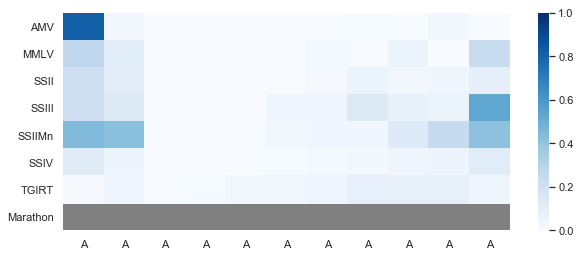

a10 stop


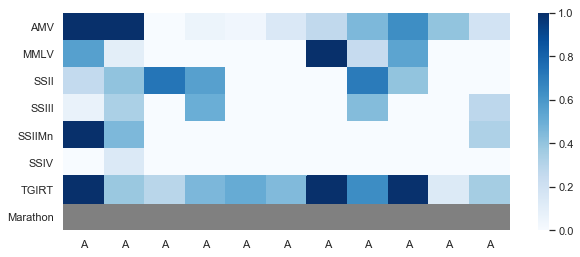

a5 readthrough rna_framework -na


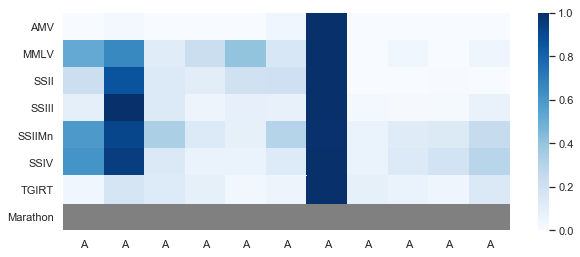

a5 stop


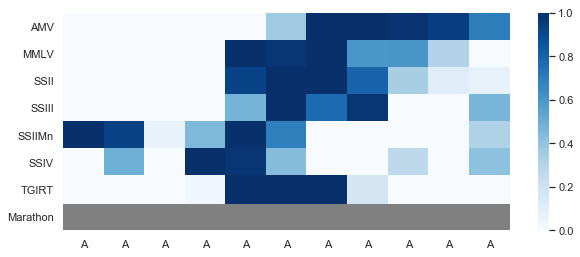

a5 readthrough shapemapper2


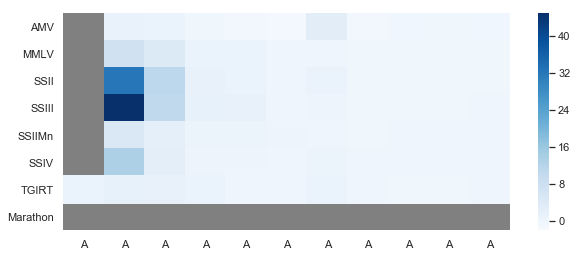

a10 readthrough shapemapper2


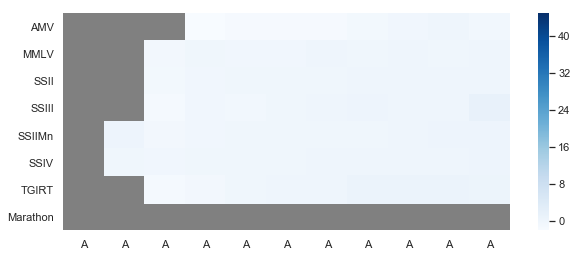

a5 readthrough shapemapper1


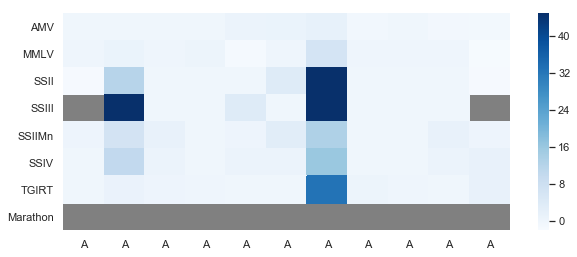

a10 readthrough shapemapper1


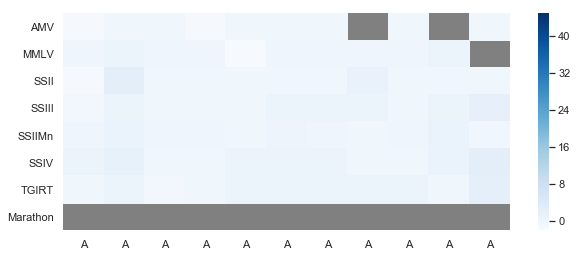

a5 readthrough rnaframework -ra


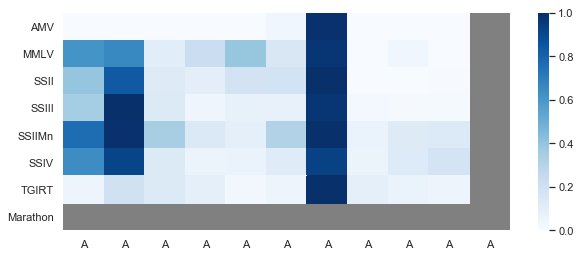

a10 readthrough rnaframework -ra


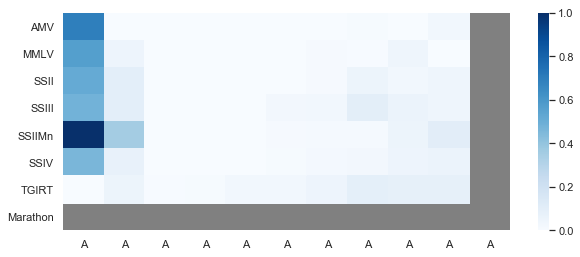

a5 readthrough rnaframework default


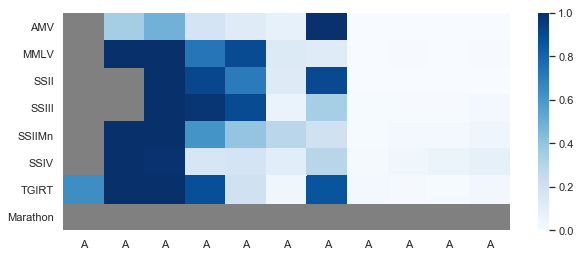

a10 readthrough rnaframework default


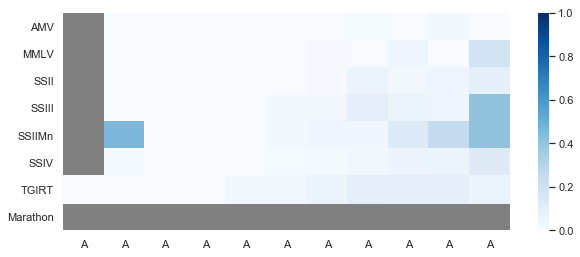

In [26]:
# Plot synthetic TOD construct reactivity heatmaps
def make_fig5_heatmap_syn(seq, reactivity_dict, vmin=0, vmax=1):
    heatmap_labels = list(seq[s41_PLOTSTART:s41_PLOTEND])
    heatmap_data = []
    for rt_name in rt_names:
        heatmap_reac = [np.nan] * len(heatmap_labels)
        if reactivity_dict[rt_name] != None:
            heatmap_reac = reactivity_dict[rt_name].all_reactivities[s41_PLOTSTART:s41_PLOTEND]
            heatmap_reac = [np.nan if (x == 'NaN' or float(x) < vmin) else float(x) for x in heatmap_reac]
        heatmap_data += [heatmap_reac]
    heatmap_data = np.array(heatmap_data)
    heatmap_df = pd.DataFrame(heatmap_data, index=rt_names, columns=heatmap_labels)
    df_mask = heatmap_df.isnull()
    sns.set(font_scale=1)
    plt.figure(figsize=(10,4))
    g = sns.heatmap(heatmap_df, mask=df_mask, cmap='Blues', vmin=vmin, vmax=vmax)
    g.set_facecolor('grey')
    plt.show()

print('a10 readthrough rna_framework -na')
make_fig5_heatmap_syn(s41, a10_reactivity_dict)
print('a10 stop')
make_fig5_heatmap_syn(s41, a10_reactivity_dict_stop)
print('a5 readthrough rna_framework -na')
make_fig5_heatmap_syn(s41, a5_reactivity_dict)
print('a5 stop')
make_fig5_heatmap_syn(s41, a5_reactivity_dict_stop)
print('a5 readthrough shapemapper2')
make_fig5_heatmap_syn(s41, a5_reactivity_dict_sm, vmin=-2, vmax=45)
print('a10 readthrough shapemapper2')
make_fig5_heatmap_syn(s41, a10_reactivity_dict_sm, vmin=-2, vmax=45)
print('a5 readthrough shapemapper1')
make_fig5_heatmap_syn(s41, a5_reactivity_dict_sm1, vmin=-2, vmax=45)
print('a10 readthrough shapemapper1')
make_fig5_heatmap_syn(s41, a10_reactivity_dict_sm1, vmin=-2, vmax=45)
print('a5 readthrough rnaframework -ra')
make_fig5_heatmap_syn(s41, a5_reactivity_dict_ra)
print('a10 readthrough rnaframework -ra')
make_fig5_heatmap_syn(s41, a10_reactivity_dict_ra)
print('a5 readthrough rnaframework default')
make_fig5_heatmap_syn(s41, a5_reactivity_dict_la)
print('a10 readthrough rnaframework default')
make_fig5_heatmap_syn(s41, a10_reactivity_dict_la)

a5 readthrough rnaframework default raw


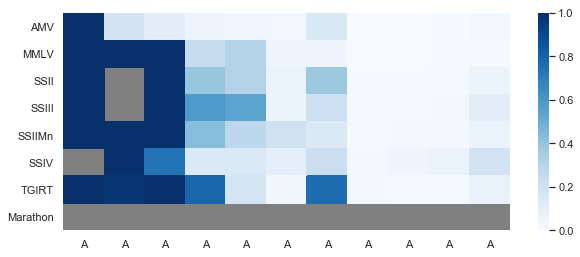

a10 readthrough rnaframework default raw


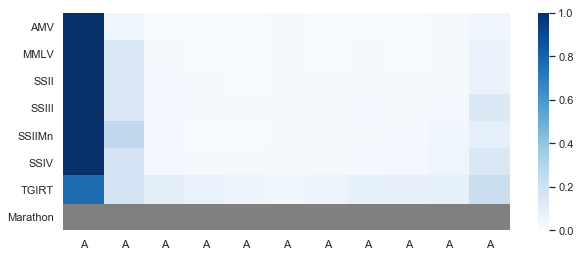

a5 stop rnaframework default raw


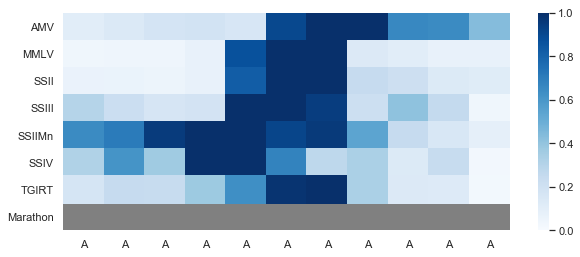

a10 stop rnaframework default raw


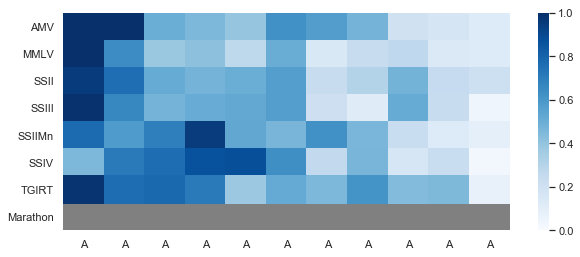

a5 shapemapper2 raw


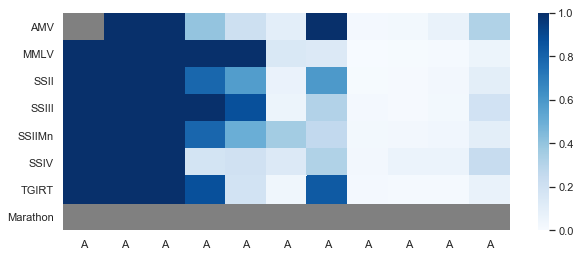

a10 shapemapper2 raw


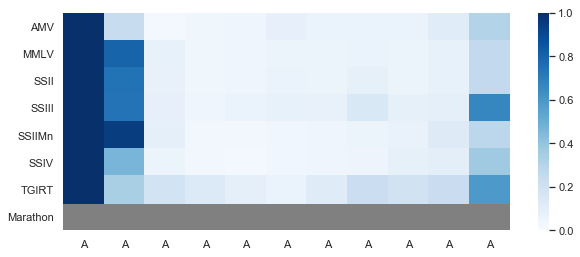

a5 shapemapper1/m2seq raw


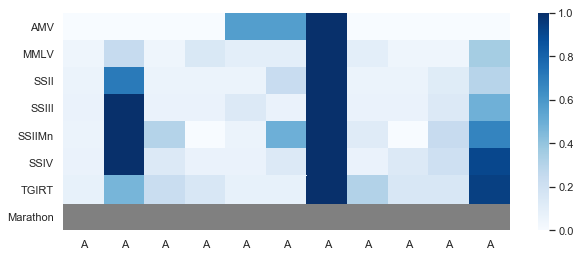

a10 shapemapper1/m2seq raw


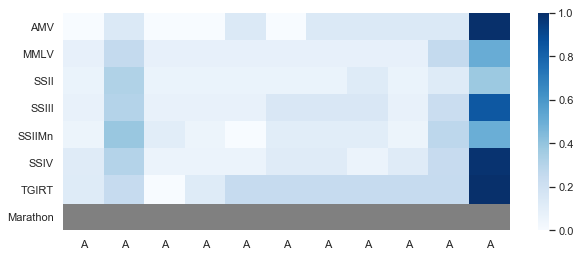

In [21]:
# Plot synthetic TOD construct reactivity heatmaps, not background subtracted
print('a5 readthrough rnaframework default raw')
make_fig5_heatmap_syn(s41, a5_reactivity_dict_la_raw)
print('a10 readthrough rnaframework default raw')
make_fig5_heatmap_syn(s41, a10_reactivity_dict_la_raw)
print('a5 stop rnaframework default raw')
make_fig5_heatmap_syn(s41, a5_reactivity_dict_stop_raw)
print('a10 stop rnaframework default raw')
make_fig5_heatmap_syn(s41, a10_reactivity_dict_stop_raw)
print('a5 shapemapper2 raw')
make_fig5_heatmap_syn(s41, a5_reactivity_dict_sm_raw)
print('a10 shapemapper2 raw')
make_fig5_heatmap_syn(s41, a10_reactivity_dict_sm_raw)
print('a5 shapemapper1/m2seq raw')
make_fig5_heatmap_syn(s41, a5_reactivity_dict_sm1_raw)
print('a10 shapemapper1/m2seq raw')
make_fig5_heatmap_syn(s41, a10_reactivity_dict_sm1_raw)

s1 dms rnaframework readthrough


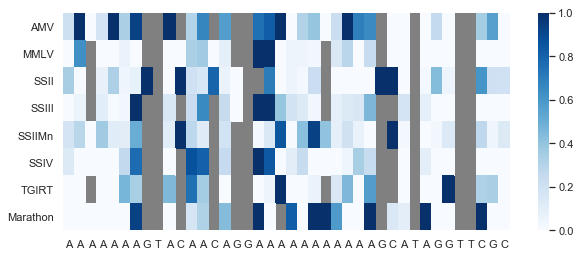

s1 dms rnaframework stop


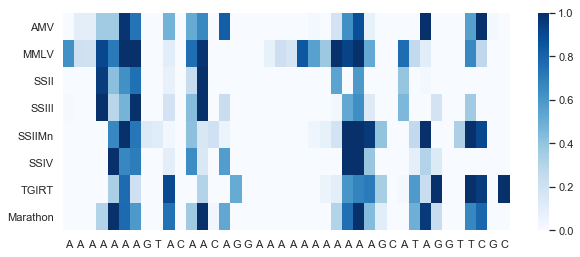

s1 shape rnaframework readthrough


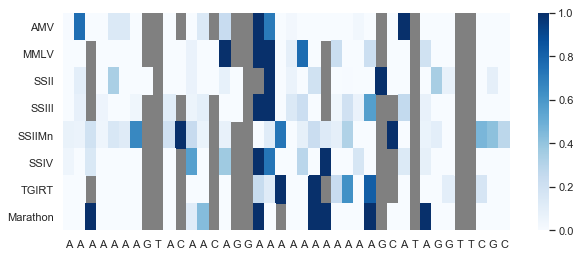

s1 shape rnaframework stop


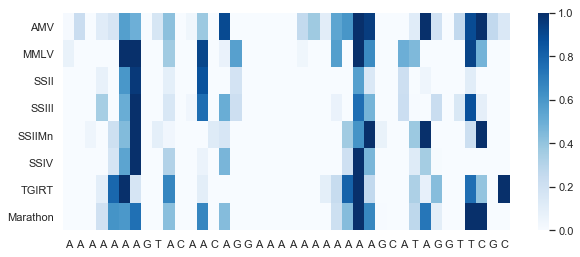

s7 dms rnaframework readthrough


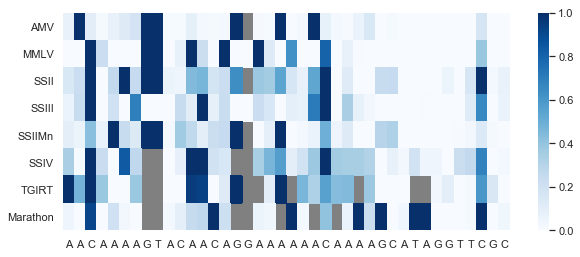

s7 dms rnaframework stop


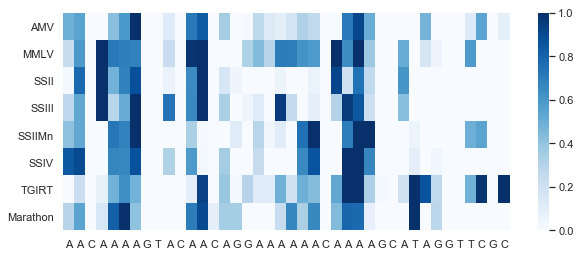

s7 shape rnaframework readthrough


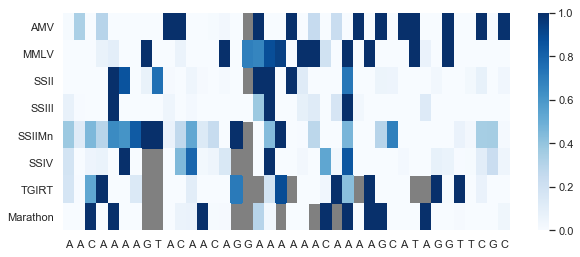

s7 shape rnaframework stop


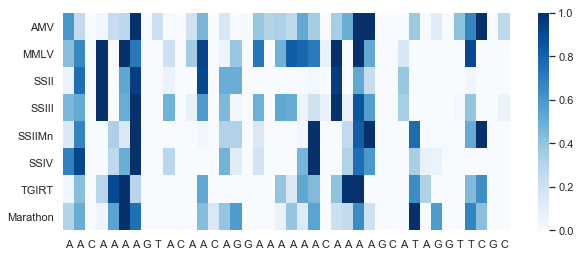

s1 shapemapper2 dms


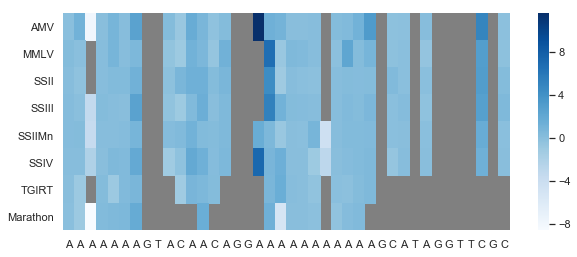

s1 shapemapper2 shape


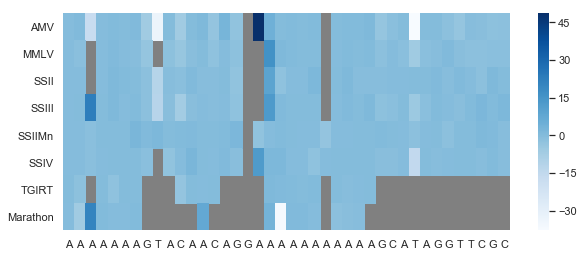

s7 shapemapper2 dms


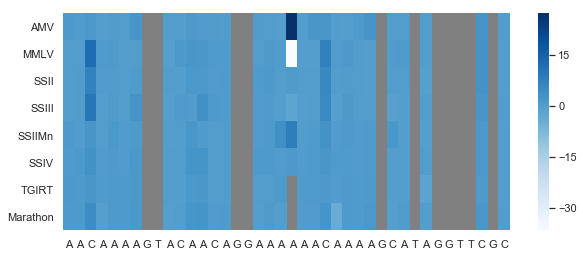

s7 shapemapper2 shape


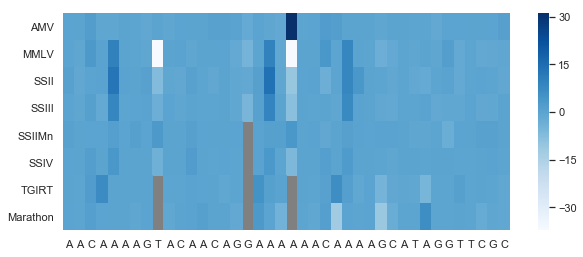

s1 shapemapper1 dms


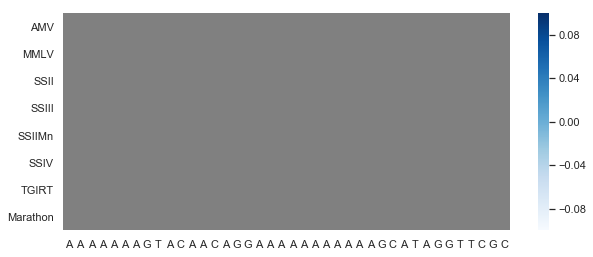

s1 shapemapper1 shape


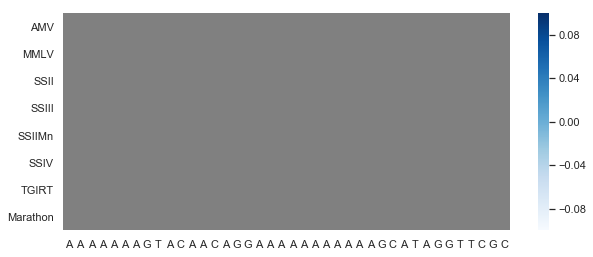

s7 shapemapper1 dms


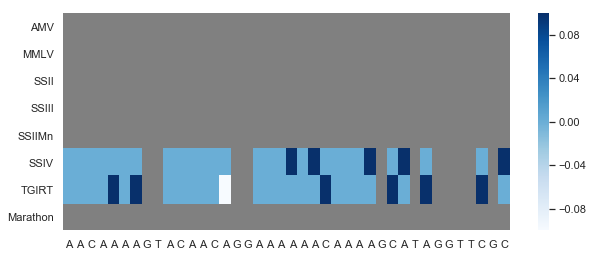

s7 shapemapper1 shape


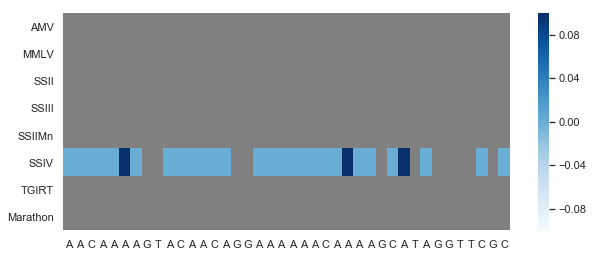

In [27]:
# Plot TOD-S1 and TOD-S7 reactivity heatmaps
def make_fig5_heatmap(seq, reactivity_dict):
    heatmap_labels = list(seq[LASTA_START:LASTA_END])
    heatmap_data = []
    for rt_name in rt_names:
        heatmap_reac = [np.nan] * len(heatmap_labels)
        if reactivity_dict[rt_name] != None:
            heatmap_reac = reactivity_dict[rt_name].all_reactivities[LASTA_START:LASTA_END]
            heatmap_reac = [np.nan if x == 'NaN' else float(x) for x in heatmap_reac]
        heatmap_data += [heatmap_reac]
    heatmap_data = np.array(heatmap_data)
    heatmap_df = pd.DataFrame(heatmap_data, index=rt_names, columns=heatmap_labels)
    df_mask = heatmap_df.isnull()
    plt.figure(figsize=(10,4))
    g = sns.heatmap(heatmap_df, mask=df_mask, cmap='Blues')
    g.set_facecolor('grey')
    plt.show()

print("s1 dms rnaframework readthrough")
make_fig5_heatmap(s1, s1_reactivity_dict_dms)
print("s1 dms rnaframework stop")
make_fig5_heatmap(s1, s1_reactivity_dict_dms_stop)
print("s1 shape rnaframework readthrough")
make_fig5_heatmap(s1, s1_reactivity_dict_shape)
print("s1 shape rnaframework stop")
make_fig5_heatmap(s1, s1_reactivity_dict_shape_stop)

print("s7 dms rnaframework readthrough")
make_fig5_heatmap(s7, s7_reactivity_dict_dms)
print("s7 dms rnaframework stop")
make_fig5_heatmap(s7, s7_reactivity_dict_dms_stop)
print("s7 shape rnaframework readthrough")
make_fig5_heatmap(s7, s7_reactivity_dict_shape)
print("s7 shape rnaframework stop")
make_fig5_heatmap(s7, s7_reactivity_dict_shape_stop)

print("s1 shapemapper2 dms")
make_fig5_heatmap(s1, s1_reactivity_dict_dms_sm)
print("s1 shapemapper2 shape")
make_fig5_heatmap(s1, s1_reactivity_dict_shape_sm)
print("s7 shapemapper2 dms")
make_fig5_heatmap(s7, s7_reactivity_dict_dms_sm)
print("s7 shapemapper2 shape")
make_fig5_heatmap(s7, s7_reactivity_dict_shape_sm)


print("s1 shapemapper1 dms")
make_fig5_heatmap(s1, s1_reactivity_dict_dms_sm1)
print("s1 shapemapper1 shape")
make_fig5_heatmap(s1, s1_reactivity_dict_shape_sm1)
print("s7 shapemapper1 dms")
make_fig5_heatmap(s7, s7_reactivity_dict_dms_sm1)
print("s7 shapemapper1 shape")
make_fig5_heatmap(s7, s7_reactivity_dict_shape_sm1)
